# Project 1 - Population Prediction
### CS 5/7394 - Dr. Mark Fontenot
### Amory Weinzierl, Randolph Rankin, Sofia Murillo, Jennifer Carballo

In [1053]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# ignores warnings
import warnings
warnings.filterwarnings('ignore')

## data preparation

In [1054]:
# reads in csv file

df = pd.read_csv("aggregate_hdi_indicators_with_population.csv")

In [1055]:
# display dataframe created from csv file

df

,Entity,Code,Year,Population (historical estimates),"Fertility rate (Complete Gapminder, v12) (2017)","Mortality rate, infant (per 1,000 live births)",Life expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",Expected Years of Schooling (years),"GNI per capita, PPP (constant 2017 international $)",Actual Human Development Index (UNDP)
0,Afghanistan,AFG,1800,3280000.0,7.00,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1801,3280000.0,7.00,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1802,3280000.0,7.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1803,3280000.0,7.00,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1804,3280000.0,7.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
49729,Zimbabwe,ZWE,2017,14236599.0,3.68,4.05,60.812,8.2,10.3,3207.887558,0.535
49730,Zimbabwe,ZWE,2018,14438812.0,NaN,3.93,61.195,NaN,NaN,3262.224759,NaN
49731,Zimbabwe,ZWE,2019,14645473.0,NaN,3.84,61.490,NaN,NaN,NaN,NaN
49732,Zimbabwe,ZWE,2020,14862927.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1056]:
# calculate HDI rate per year 

#life expectancy index
#<-- ([Life expectancy] - [Life Expectancy Minimum]) / ([Life Expectancy Goalpost] - [Life Expectancy Minimum])
# ([life expentance of country] - 20) / (85 - 20))

#education expectancy index
#((([Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))] 
# - [Mean Years of Schooling Minimum]) / ([Mean Years of Schooling Goalpost] - [Mean Years of Schooling Minimum])) + (([Expected Years of Schooling (years)] - [Expected Years of Schooling Minimum]) 
# / ([Expected Years of Schooling Goalpost] - [Expected Years of Schooling Minimum]))) / 2

#income expectancy index
# (LN([GNI per capita, PPP (constant 2017 international $)]) - LN([GNI per Capita Minimum])) 
# / (LN([GNI per Capita Goalpost]) - LN([GNI per Capita Minimum]))

#HDI
# ([Calculated Life Expectancy Index] * [Calculated Education Index] * [Calculated GNI per Capita Index]) ^ (1/3)


# find life expectancy weight for each country (life expectancy/global life expetancy)
# apply weight to life expectany (weight (^) * life expectancy)
# create new column to store
# use all countries weighted life expectancies to get global life expectancy
# do with other factors
# find gobal HDI

In [1057]:
# drop unnecessary columns & rename dataframe

factors = df.drop(columns = ['Fertility rate (Complete Gapminder, v12) (2017)', 'Mortality rate, infant (per 1,000 live births)', 'Code'])

In [1058]:
factors

,Entity,Year,Population (historical estimates),Life expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",Expected Years of Schooling (years),"GNI per capita, PPP (constant 2017 international $)",Actual Human Development Index (UNDP)
0,Afghanistan,1800,3280000.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1801,3280000.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1802,3280000.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1803,3280000.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1804,3280000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
49729,Zimbabwe,2017,14236599.0,60.812,8.2,10.3,3207.887558,0.535
49730,Zimbabwe,2018,14438812.0,61.195,NaN,NaN,3262.224759,NaN
49731,Zimbabwe,2019,14645473.0,61.490,NaN,NaN,NaN,NaN
49732,Zimbabwe,2020,14862927.0,NaN,NaN,NaN,NaN,NaN


In [1059]:
# drop all rows that have less than 4 non-na values

factors = factors.dropna(thresh=4)

In [1060]:
factors

,Entity,Year,Population (historical estimates),Life expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",Expected Years of Schooling (years),"GNI per capita, PPP (constant 2017 international $)",Actual Human Development Index (UNDP)
70,Afghanistan,1870,4142928.0,NaN,0.01,NaN,NaN,NaN
75,Afghanistan,1875,4247357.0,NaN,0.01,NaN,NaN,NaN
80,Afghanistan,1880,4354370.0,NaN,0.01,NaN,NaN,NaN
85,Afghanistan,1885,4464010.0,NaN,0.01,NaN,NaN,NaN
90,Afghanistan,1890,4576341.0,NaN,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
49727,Zimbabwe,2015,13814642.0,59.534,8.20,10.3,2858.616749,0.529
49728,Zimbabwe,2016,14030338.0,60.294,8.20,10.3,2884.156050,0.532
49729,Zimbabwe,2017,14236599.0,60.812,8.20,10.3,3207.887558,0.535
49730,Zimbabwe,2018,14438812.0,61.195,NaN,NaN,3262.224759,NaN


## Data Calculation

In [1061]:
# create new rows to hold weights

factors["Life Expectancy Weight"] = np.nan
factors["Weighted Life Expectancy"] = np.nan
factors["YOS Weight"] = np.nan
factors["Weighted YOS"] = np.nan
factors["Expected YOS Weight"] = np.nan
factors["Weighted Expected YOS"] = np.nan
factors["GNI Weight"] = np.nan
factors["Weighted GNI"] = np.nan

In [1062]:
factors

,Entity,Year,Population (historical estimates),Life expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",Expected Years of Schooling (years),"GNI per capita, PPP (constant 2017 international $)",Actual Human Development Index (UNDP),Life Expectancy Weight,Weighted Life Expectancy,YOS Weight,Weighted YOS,Expected YOS Weight,Weighted Expected YOS,GNI Weight,Weighted GNI
70,Afghanistan,1870,4142928.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,Afghanistan,1875,4247357.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,Afghanistan,1880,4354370.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Afghanistan,1885,4464010.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Afghanistan,1890,4576341.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,Zimbabwe,2015,13814642.0,59.534,8.20,10.3,2858.616749,0.529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49728,Zimbabwe,2016,14030338.0,60.294,8.20,10.3,2884.156050,0.532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49729,Zimbabwe,2017,14236599.0,60.812,8.20,10.3,3207.887558,0.535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49730,Zimbabwe,2018,14438812.0,61.195,NaN,NaN,3262.224759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1063]:
# reorder rows

factors = factors[["Entity",
                   "Year", 
                   "Population (historical estimates)", 
                   "Life expectancy", "Life Expectancy Weight", "Weighted Life Expectancy", 
                   "Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))", "YOS Weight", "Weighted YOS",
                   "Expected Years of Schooling (years)", "Expected YOS Weight", "Weighted Expected YOS",
                   "GNI per capita, PPP (constant 2017 international $)", "GNI Weight", "Weighted GNI",
                   "Actual Human Development Index (UNDP)"
                  ]]

In [1064]:
factors

,Entity,Year,Population (historical estimates),Life expectancy,Life Expectancy Weight,Weighted Life Expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",YOS Weight,Weighted YOS,Expected Years of Schooling (years),Expected YOS Weight,Weighted Expected YOS,"GNI per capita, PPP (constant 2017 international $)",GNI Weight,Weighted GNI,Actual Human Development Index (UNDP)
70,Afghanistan,1870,4142928.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,Afghanistan,1875,4247357.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,Afghanistan,1880,4354370.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Afghanistan,1885,4464010.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Afghanistan,1890,4576341.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,Zimbabwe,2015,13814642.0,59.534,NaN,NaN,8.20,NaN,NaN,10.3,NaN,NaN,2858.616749,NaN,NaN,0.529
49728,Zimbabwe,2016,14030338.0,60.294,NaN,NaN,8.20,NaN,NaN,10.3,NaN,NaN,2884.156050,NaN,NaN,0.532
49729,Zimbabwe,2017,14236599.0,60.812,NaN,NaN,8.20,NaN,NaN,10.3,NaN,NaN,3207.887558,NaN,NaN,0.535
49730,Zimbabwe,2018,14438812.0,61.195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3262.224759,NaN,NaN,NaN


In [1065]:
# test out to find mean of population for only rows where year = 1870

print(factors['Population (historical estimates)'].loc[factors['Year'] == 1870].mean())

10992194.0990991


In [1066]:
# test out to find mean of population for only rows where year = 1870 and the life expectancy column is not 

print(factors['Population (historical estimates)'].loc[(factors['Year'] == 1870) 
                                                       & (pd.notna(factors['Life expectancy']))].mean())

12518941.8


In [1067]:
# test out weight equation on the above requirements

factors['Life Expectancy Weight'].loc[(factors['Year'] == 1870) & (pd.notna(factors['Life expectancy']))] = (
    factors['Population (historical estimates)'].loc[(factors['Year'] == 1870) & (pd.notna(factors['Life expectancy']))] 
    / factors['Population (historical estimates)'].loc[(factors['Year'] == 1870) 
                                                       & (pd.notna(factors['Life expectancy']))].mean())

In [1068]:
# take a look at dataframe to see how its been populated based on equation above

factors.loc[(factors['Year'] == 1870) & (pd.notna(factors['Life expectancy']))]

,Entity,Year,Population (historical estimates),Life expectancy,Life Expectancy Weight,Weighted Life Expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",YOS Weight,Weighted YOS,Expected Years of Schooling (years),Expected YOS Weight,Weighted Expected YOS,"GNI per capita, PPP (constant 2017 international $)",GNI Weight,Weighted GNI,Actual Human Development Index (UNDP)
2464,Austria,1870,4528451.0,34.400002,0.361728,NaN,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4018,Belgium,1870,5097637.0,40.900002,0.407194,NaN,2.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11333,Denmark,1870,1887969.0,45.970001,0.150809,NaN,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14644,France,1870,38184704.0,36.389999,3.050154,NaN,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19378,Iceland,1870,69836.0,38.340000,0.005578,NaN,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21448,Japan,1870,34388672.0,36.592640,2.746931,NaN,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30430,Netherlands,1870,3609009.0,37.320000,0.288284,NaN,2.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32568,Norway,1870,1736968.0,50.849998,0.138747,NaN,3.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42380,Sweden,1870,4168145.0,44.970001,0.332947,NaN,3.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46846,United Kingdom,1870,31518027.0,40.605000,2.517627,NaN,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1069]:
factors.loc[factors['Year'] == 1870]

,Entity,Year,Population (historical estimates),Life expectancy,Life Expectancy Weight,Weighted Life Expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",YOS Weight,Weighted YOS,Expected Years of Schooling (years),Expected YOS Weight,Weighted Expected YOS,"GNI per capita, PPP (constant 2017 international $)",GNI Weight,Weighted GNI,Actual Human Development Index (UNDP)
70,Afghanistan,1870,4142928.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,Albania,1870,606465.0,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,Algeria,1870,3461795.0,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1576,Argentina,1870,1793839.0,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2242,Australia,1870,1759825.0,NaN,NaN,NaN,1.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47512,Uruguay,1870,342659.0,NaN,NaN,NaN,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48400,Venezuela,1870,1700687.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49138,Yemen,1870,2813705.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49360,Zambia,1870,1597641.0,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1070]:
# go through all rows of dataframe and find weights for all factors based on year and that factor column is not nan

for year in range(1800, 2020):
    factors['Life Expectancy Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['Life expectancy']))] = (
        factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                         & (pd.notna(factors['Life expectancy']))] 
        / factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                           & (pd.notna(factors['Life expectancy']))].mean())
    
    
    factors['YOS Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']))] = (
        factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                         & (pd.notna(factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']))] 
        / factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                           & (pd.notna(factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']))].mean())
    
    factors['Expected YOS Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['Expected Years of Schooling (years)']))] = (
        factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                         & (pd.notna(factors['Expected Years of Schooling (years)']))] 
        / factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                           & (pd.notna(factors['Expected Years of Schooling (years)']))].mean())
    
    factors['GNI Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['GNI per capita, PPP (constant 2017 international $)']))] = (
        factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                         & (pd.notna(factors['GNI per capita, PPP (constant 2017 international $)']))] 
        / factors['Population (historical estimates)'].loc[(factors['Year'] == year) 
                                                           & (pd.notna(factors['GNI per capita, PPP (constant 2017 international $)']))].mean())

In [1071]:
# take a look at dataframe
factors.loc[(factors['Year'] == 1900) & (pd.notna(factors['Life expectancy']))]

,Entity,Year,Population (historical estimates),Life expectancy,Life Expectancy Weight,Weighted Life Expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",YOS Weight,Weighted YOS,Expected Years of Schooling (years),Expected YOS Weight,Weighted Expected YOS,"GNI per capita, PPP (constant 2017 international $)",GNI Weight,Weighted GNI,Actual Human Development Index (UNDP)
1606,Argentina,1900,4689224.0,39.000000,0.432181,NaN,0.78,0.347993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3826,Belarus,1900,4909551.0,36.200001,0.452487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4048,Belgium,1900,6717693.0,46.520000,0.619134,NaN,2.58,0.498528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5008,Bolivia,1900,1809836.0,26.000000,0.166803,NaN,0.17,0.134310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5746,Brazil,1900,18063384.0,29.000000,1.664807,NaN,0.47,1.340505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6262,Bulgaria,1900,3994654.0,40.200001,0.368166,NaN,1.33,0.296448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8554,Chile,1900,3135464.0,29.000000,0.288979,NaN,1.30,0.232686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8998,Colombia,1900,4089052.0,29.000000,0.376866,NaN,0.74,0.303453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9736,Costa Rica,1900,316531.0,32.000000,0.029173,NaN,1.21,0.023490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10402,Cuba,1900,1718198.0,32.000000,0.158357,NaN,0.38,0.127509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1072]:
# go through dataframe
# make each factors weighted by multiplying weight by original factors

for year in range(1800, 2020):
    factors['Weighted Life Expectancy'].loc[(factors['Year'] == year) & (pd.notna(factors['Life expectancy']))] = (
        factors['Life expectancy'].loc[(factors['Year'] == year) & (pd.notna(factors['Life expectancy']))]
        * factors['Life Expectancy Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['Life expectancy']))])
    
    
    factors['Weighted YOS'].loc[(factors['Year'] == year) & (pd.notna(factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']))] = (
        factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))'].loc[(factors['Year'] == year) & (pd.notna(factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']))] 
        * factors['YOS Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']))])
    
    
    factors['Weighted Expected YOS'].loc[(factors['Year'] == year) & (pd.notna(factors['Expected Years of Schooling (years)']))] = (
        factors['Expected Years of Schooling (years)'].loc[(factors['Year'] == year) & (pd.notna(factors['Expected Years of Schooling (years)']))] 
        * factors['Expected YOS Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['Expected Years of Schooling (years)']))])
    
    factors['Weighted GNI'].loc[(factors['Year'] == year) & (pd.notna(factors['GNI per capita, PPP (constant 2017 international $)']))] = (
        factors['GNI per capita, PPP (constant 2017 international $)'].loc[(factors['Year'] == year) & (pd.notna(factors['GNI per capita, PPP (constant 2017 international $)']))] 
        * factors['GNI Weight'].loc[(factors['Year'] == year) & (pd.notna(factors['GNI per capita, PPP (constant 2017 international $)']))])

In [1073]:
factors

,Entity,Year,Population (historical estimates),Life expectancy,Life Expectancy Weight,Weighted Life Expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",YOS Weight,Weighted YOS,Expected Years of Schooling (years),Expected YOS Weight,Weighted Expected YOS,"GNI per capita, PPP (constant 2017 international $)",GNI Weight,Weighted GNI,Actual Human Development Index (UNDP)
70,Afghanistan,1870,4142928.0,NaN,NaN,NaN,0.01,0.376897,0.003769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,Afghanistan,1875,4247357.0,NaN,NaN,NaN,0.01,0.372985,0.003730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,Afghanistan,1880,4354370.0,NaN,NaN,NaN,0.01,0.374563,0.003746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Afghanistan,1885,4464010.0,NaN,NaN,NaN,0.01,0.366628,0.003666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Afghanistan,1890,4576341.0,NaN,NaN,NaN,0.01,0.364788,0.003648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,Zimbabwe,2015,13814642.0,59.534,0.438038,26.078146,8.20,0.357247,2.929428,10.3,0.357910,3.686475,2858.616749,0.301888,862.981207,0.529
49728,Zimbabwe,2016,14030338.0,60.294,0.439857,26.520747,8.20,0.358717,2.941481,10.3,0.359391,3.701726,2884.156050,0.303136,874.291194,0.532
49729,Zimbabwe,2017,14236599.0,60.812,0.441366,26.840351,8.20,0.359934,2.951458,10.3,0.362513,3.733883,3207.887558,0.369665,1185.842215,0.535
49730,Zimbabwe,2018,14438812.0,61.195,0.442753,27.094253,NaN,NaN,NaN,NaN,NaN,NaN,3262.224759,0.299518,977.094727,NaN


In [1074]:
# create new dataframe to contain world values
# take mean of weighted averages for every country by year and store in dataset

column_names = ['Year', 'Population', 'Life Expectancy', 'YOS', 'Expected YOS', 'GNI']
world_values = pd.DataFrame(columns = column_names)

for year in range(1800, 2020):
    population = factors['Population (historical estimates)'].loc[factors['Year'] == year].mean(skipna = True)
    life_expectancy = factors['Weighted Life Expectancy'].loc[factors['Year'] == year].mean(skipna = True)
    yos = factors['Weighted YOS'].loc[factors['Year'] == year].mean(skipna = True)
    expected_yos = factors['Weighted Expected YOS'].loc[factors['Year'] == year].mean(skipna = True)
    gni = factors['Weighted GNI'].loc[factors['Year'] == year].mean(skipna = True)
    # print( "Year: ", year, " Life exp: ", life_expectancy, " YOS: ", yos, " Expected YOS: ", expected_yos, " Weighted GNI: ", weighted_GNI)
    
    world_values = world_values.append({'Year' : year, 'Population' : population, 'Life Expectancy' : life_expectancy, 'YOS': yos, 
                                       'Expected YOS' : expected_yos, 'GNI': gni}, 
                ignore_index = True)

In [1075]:
world_values

,Year,Population,Life Expectancy,YOS,Expected YOS,GNI
0,1800.0,2.500000e+06,32.130001,NaN,NaN,NaN
1,1801.0,2.489400e+06,36.849998,NaN,NaN,NaN
2,1802.0,2.478845e+06,40.130001,NaN,NaN,NaN
3,1803.0,6.785333e+06,40.050921,NaN,NaN,NaN
4,1804.0,2.457869e+06,39.650002,NaN,NaN,NaN
...,...,...,...,...,...,...
215,2015.0,3.153755e+07,71.999304,7.906675,13.108429,15471.989544
216,2016.0,3.189749e+07,72.223146,7.982917,13.188746,15780.970942
217,2017.0,3.225577e+07,72.426848,7.998527,13.193718,16215.177712
218,2018.0,3.261146e+07,72.612756,NaN,NaN,16586.907293


In [1076]:
# make year column integers

world_values['Year'] = world_values['Year'].astype(int)

In [1077]:
world_values

,Year,Population,Life Expectancy,YOS,Expected YOS,GNI
0,1800,2.500000e+06,32.130001,NaN,NaN,NaN
1,1801,2.489400e+06,36.849998,NaN,NaN,NaN
2,1802,2.478845e+06,40.130001,NaN,NaN,NaN
3,1803,6.785333e+06,40.050921,NaN,NaN,NaN
4,1804,2.457869e+06,39.650002,NaN,NaN,NaN
...,...,...,...,...,...,...
215,2015,3.153755e+07,71.999304,7.906675,13.108429,15471.989544
216,2016,3.189749e+07,72.223146,7.982917,13.188746,15780.970942
217,2017,3.225577e+07,72.426848,7.998527,13.193718,16215.177712
218,2018,3.261146e+07,72.612756,NaN,NaN,16586.907293


In [1078]:
world_values = world_values.dropna()

In [1079]:
world_values

,Year,Population,Life Expectancy,YOS,Expected YOS,GNI
190,1990,2.276592e+07,65.459139,5.464198,9.618479,13036.525162
191,1991,2.313796e+07,65.638388,5.465263,9.663838,12931.612690
192,1992,2.349963e+07,65.816729,5.598505,9.758527,12848.391243
193,1993,2.385296e+07,66.000292,5.720805,9.826136,12741.379541
194,1994,2.420147e+07,66.191698,5.858699,9.909724,12396.355089
195,1995,2.454789e+07,66.393972,5.995026,10.035383,9983.662735
196,1996,2.489267e+07,66.607294,6.127245,10.129123,10205.383220
197,1997,2.523521e+07,66.831118,6.273268,10.192042,10581.034473
198,1998,2.557601e+07,67.063629,6.404265,10.310817,10743.334413
199,1999,2.591552e+07,67.305912,6.523771,10.432506,10980.900990


In [1080]:
# create HDI dataframe to contain all calculated indexes and HDI for each year

HDI = column_names = ['Year', 'Population', 'Life Expectancy Index', 'Education Expectancy Index', 'Income Expectancy Index', 'HDI']
HDI = pd.DataFrame(columns = column_names)

for item, rows in world_values.iterrows():
    lei = (world_values['Life Expectancy'].loc[item] - 20)/(85 - 20)
    eei = ((world_values['YOS'].loc[item] / 15) + (world_values['Expected YOS'].loc[item] /18 )) / 2
    iei = (math.log(gni) - math.log(100))/(math.log(75000) - math.log(100))
    hdi = math.pow((lei * eei * iei), (1/3))
    
    # print( "Year: ", year, " Life exp: ", life_expectancy, " YOS: ", yos, " Expected YOS: ", expected_yos, " Weighted GNI: ", weighted_GNI)
    
    HDI = HDI.append({'Year' : rows['Year'],
                      'Population' : rows['Population'],
                      'Life Expectancy Index' : lei, 
                      'Education Expectancy Index' : eei,
                      'Income Expectancy Index': iei,
                      'HDI' : hdi},
                     ignore_index = True)

In [1081]:
HDI

,Year,Population,Life Expectancy Index,Education Expectancy Index,Income Expectancy Index,HDI
0,1990.0,2.276592e+07,0.699371,0.449320,0.770558,0.623289
1,1991.0,2.313796e+07,0.702129,0.450615,0.770558,0.624706
2,1992.0,2.349963e+07,0.704873,0.457687,0.770558,0.628774
3,1993.0,2.385296e+07,0.707697,0.463642,0.770558,0.632332
4,1994.0,2.420147e+07,0.710642,0.470560,0.770558,0.636342
5,1995.0,2.454789e+07,0.713753,0.478595,0.770558,0.640876
6,1996.0,2.489267e+07,0.717035,0.485606,0.770558,0.644976
7,1997.0,2.523521e+07,0.720479,0.492221,0.770558,0.648927
8,1998.0,2.557601e+07,0.724056,0.499887,0.770558,0.653356
9,1999.0,2.591552e+07,0.727783,0.507251,0.770558,0.657673


In [1082]:
# make years integers

HDI['Year'] = HDI['Year'].astype(int)

In [1083]:
HDI

,Year,Population,Life Expectancy Index,Education Expectancy Index,Income Expectancy Index,HDI
0,1990,2.276592e+07,0.699371,0.449320,0.770558,0.623289
1,1991,2.313796e+07,0.702129,0.450615,0.770558,0.624706
2,1992,2.349963e+07,0.704873,0.457687,0.770558,0.628774
3,1993,2.385296e+07,0.707697,0.463642,0.770558,0.632332
4,1994,2.420147e+07,0.710642,0.470560,0.770558,0.636342
5,1995,2.454789e+07,0.713753,0.478595,0.770558,0.640876
6,1996,2.489267e+07,0.717035,0.485606,0.770558,0.644976
7,1997,2.523521e+07,0.720479,0.492221,0.770558,0.648927
8,1998,2.557601e+07,0.724056,0.499887,0.770558,0.653356
9,1999,2.591552e+07,0.727783,0.507251,0.770558,0.657673


## Data Analysis and Modeling

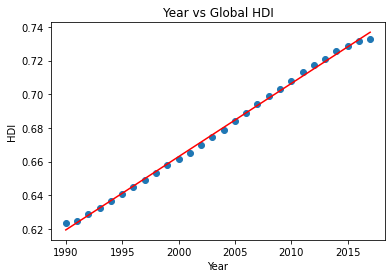

In [1084]:
# plot HDI against years

a,b = np.polyfit(HDI['Year'], HDI['HDI'], 1)

plt.scatter(HDI['Year'], HDI['HDI'])
plt.plot(HDI['Year'], a* HDI['Year'] + b, "r")
plt.title('Year vs Global HDI')
plt.xlabel('Year')
plt.ylabel('HDI')
plt.show()

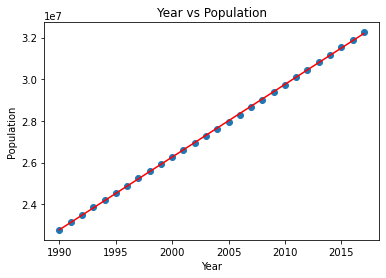

In [1085]:
# plot population against years

c,d = np.polyfit(HDI['Year'], HDI['Population'], 1)

plt.scatter(HDI['Year'], HDI['Population'])
plt.plot(HDI['Year'], c * HDI['Year'] + d, "r")
plt.title('Year vs Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [1086]:
# line of best fit to confirm 2017
hdi_2017 = a * 2017 + b
print("hdi_from_best_fit_2017 vs hdi_from_calculations_2017")
print(hdi_2017, "      ", HDI['HDI'].loc[27])

# use line of best fit to project hdi of 2122
hdi_2122 = a * 2122 + b
print("\nhdi_2122: ", hdi_2122)

# line of best fit to confirm population of 2017
population_2017 = c * 2017 + d
print("\npopulation_from_best_fit_2122 vs population_from_calculations_2122")
print(population_2017, "             ", HDI['Population'].loc[27])

#use line of best fit to project population of 2122
population_2122 = c * 2122 + d
print("population_2122: ", population_2122)

hdi_from_best_fit_2017 vs hdi_from_calculations_2017
0.7368238701052707        0.7327820742530282

hdi_2122:  1.1935525991704932

population_from_best_fit_2122 vs population_from_calculations_2122
32193267.357795477               32255765.423076924
population_2122:  68823463.68172145


In [1087]:
#create dataframe to compare index calculated values to values calculated by best fit
compare = column_names = ['Year', 'Population', 'Best Fit Calculated Population', 'Index Calculated HDI', 'Best Fit Calculated HDI']
compare = pd.DataFrame(columns = column_names)

for item, rows in HDI.iterrows():
    calc_pop = c * rows['Year'] + d
    calc_HDI = a * rows['Year'] + b
    
    compare = compare.append({'Year' : rows['Year'],
                      'Population' : rows['Population'],
                      'Best Fit Calculated Population' : calc_pop, 
                      'Index Calculated HDI' : rows['HDI'],
                      'Best Fit Calculated HDI': calc_HDI},
                     ignore_index = True)

In [1088]:
compare

,Year,Population,Best Fit Calculated Population,Index Calculated HDI,Best Fit Calculated HDI
0,1990.0,2.276592e+07,2.277407e+07,0.623289,0.619379
1,1991.0,2.313796e+07,2.312293e+07,0.624706,0.623729
2,1992.0,2.349963e+07,2.347179e+07,0.628774,0.628079
3,1993.0,2.385296e+07,2.382065e+07,0.632332,0.632429
4,1994.0,2.420147e+07,2.416951e+07,0.636342,0.636779
5,1995.0,2.454789e+07,2.451837e+07,0.640876,0.641128
6,1996.0,2.489267e+07,2.486723e+07,0.644976,0.645478
7,1997.0,2.523521e+07,2.521609e+07,0.648927,0.649828
8,1998.0,2.557601e+07,2.556495e+07,0.653356,0.654178
9,1999.0,2.591552e+07,2.591381e+07,0.657673,0.658528


In [1089]:
compare['Year'] = compare['Year'].astype(int)

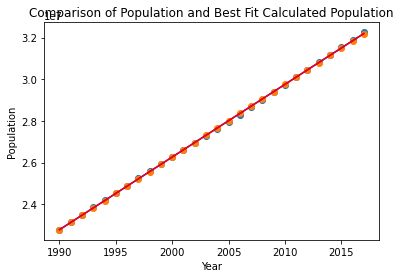

In [1090]:
# plot population and calculated population against years
# to see overlap

e,f = np.polyfit(compare['Year'], compare['Population'], 1)
g,h = np.polyfit(compare['Year'], compare['Best Fit Calculated Population'], 1)

plt.scatter(compare['Year'], compare['Population'])
plt.plot(compare['Year'], e * compare['Year'] + f, "b")

plt.scatter(compare['Year'], compare['Best Fit Calculated Population'])
plt.plot(compare['Year'], g * compare['Year'] + h, "r")

plt.title('Comparison of Population and Best Fit Calculated Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

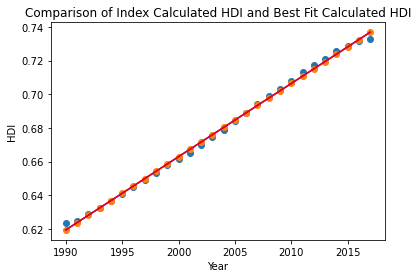

In [1091]:
# plot index calculated hdi and best fit calculated hdi against years
# to see overlap

h,i = np.polyfit(compare['Year'], compare['Index Calculated HDI'], 1)
j,k = np.polyfit(compare['Year'], compare['Best Fit Calculated HDI'], 1)

plt.scatter(compare['Year'], compare['Index Calculated HDI'])
plt.plot(compare['Year'], h * compare['Year'] + i, "b")

plt.scatter(compare['Year'], compare['Best Fit Calculated HDI'])
plt.plot(compare['Year'], j * compare['Year'] + k, "r")

plt.title('Comparison of Index Calculated HDI and Best Fit Calculated HDI')
plt.xlabel('Year')
plt.ylabel('HDI')

plt.show()

In [1092]:
# calculate all pops and HDIs from 2019 - 2122 from best fit and plot
projected = column_names = ['Years', 'Projected Population', 'Projected HDI']
projected = pd.DataFrame(columns = column_names)

# using best fit equatios from above
for year in range(2018, 2123):
    proj_pop = g * year + h
    proj_hdi = j * year + k
    
    projected = projected.append({'Years' : year,
                                  'Projected Population' : proj_pop,
                                  'Projected HDI' : proj_hdi},
                                 ignore_index = True)

In [1093]:
projected

,Years,Projected Population,Projected HDI
0,2018.0,7.039975e+08,0.741174
1,2019.0,7.043463e+08,0.745523
2,2020.0,7.046952e+08,0.749873
3,2021.0,7.050441e+08,0.754223
4,2022.0,7.053929e+08,0.758573
...,...,...,...
100,2118.0,7.388834e+08,1.176153
101,2119.0,7.392322e+08,1.180503
102,2120.0,7.395811e+08,1.184853
103,2121.0,7.399300e+08,1.189203


In [1094]:
projected['Years'] = projected['Years'].astype(int)

In [1095]:
projected

,Years,Projected Population,Projected HDI
0,2018,7.039975e+08,0.741174
1,2019,7.043463e+08,0.745523
2,2020,7.046952e+08,0.749873
3,2021,7.050441e+08,0.754223
4,2022,7.053929e+08,0.758573
...,...,...,...
100,2118,7.388834e+08,1.176153
101,2119,7.392322e+08,1.180503
102,2120,7.395811e+08,1.184853
103,2121,7.399300e+08,1.189203


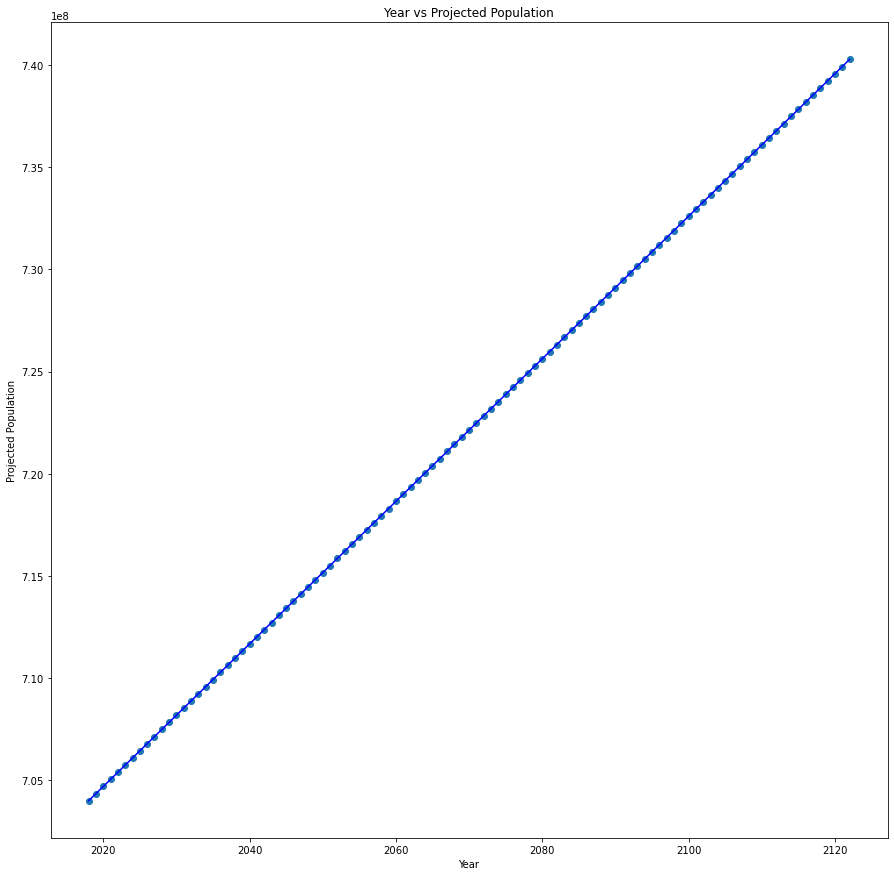

In [1104]:
# plot projected population against future years

y,z = np.polyfit(projected['Years'], projected['Projected Population'], 1)

plt.figure(figsize=(15, 15))

plt.title('Year vs Projected Population')
plt.xlabel('Year')
plt.ylabel('Projected Population')

plt.scatter(projected['Years'], projected['Projected Population'])
plt.plot(projected['Years'], y * projected['Years'] + z, "b")


plt.show()

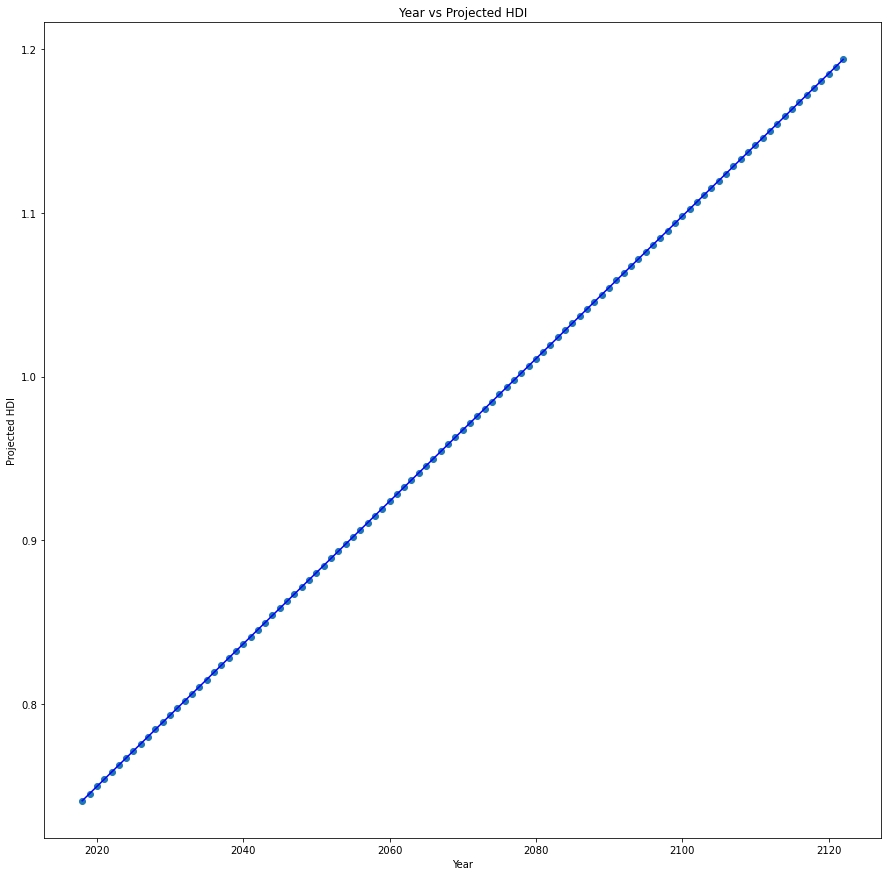

In [1105]:
# plot projected HDI against future years

r,s = np.polyfit(projected['Years'], projected['Projected HDI'], 1)

plt.figure(figsize=(15, 15))

plt.title('Year vs Projected HDI')
plt.xlabel('Year')
plt.ylabel('Projected HDI')

plt.scatter(projected['Years'], projected['Projected HDI'])
plt.plot(projected['Years'], r * projected['Years'] + s, "b")

plt.show()

In [ ]:
# hdi ended up being more of a validation factor for the population projection